# REVEIW 1

# Week 8
[Lecture 16](https://computing-in-context.afeld.me/lecture_16.html)

### Why programming languages
- Data and logic don’t live together
    - Why might this matter?

- More powerful, flexible, and expressive than spreadsheet formulas; don’t have to cram into a single line
    - `=SUM(INDEX(C3:E9,MATCH(B13,C3:C9,0),MATCH(B14,C3:E3,0)))`

- Better at working with large data

- Excel have hard limits at 1-5 million rows, but get slow long before that

- Reusable code (packages)
    - you can write functions and modules that can be called many times with different inputs. Spreadsheets cannot easily do this because formulas are tied to specific cells and must be copied manually.
    - e.g. If you write a function tax(x) in Python, you can reuse it anywhere in your code.But in Excel, if you want the same tax formula in 100 rows, you must duplicate the formula in 100 cells, and fixing an error requires updating many places.

- Automation

- Easier for Joining data, Making reusable

- Can do what spreadsheet cannot do: Complicated transforms, Automation

### Python vs. other languages
- Good for general-purpose and data stuff

- Widely used in both industry and academia

- Relatively easy to learn

- Open source

### Pandas
- A Python package (bundled up code that you can reuse)

- Very common for data science in Python

- A lot like R
    - Both organize around “data frames”

### Jupyter
- Alternative programming environment
    - It means Jupyter provides a different place to write and run code — not a traditional IDE, not a terminal, but a notebook interface where code, text, and outputs live together.

- Supports Python by default, and other languages with added kernels

- Nicely displays output of your code so you can check and share the results

- Avoids using the command line
    - It means you can run code, install packages, view results, and manage your workflow without typing commands in a terminal — you just run cells in the notebook.

### What is the purpose of a virtual environment?

A virtual environment creates an **isolated Python workspace** where you can **install packages without affecting the system Python or other projects**. It prevents version conflicts and lets each project have its own dependencies.

Example (one sentence):
Project A can use pandas 2.0 while Project B uses pandas 1.5, because each runs in its own virtual environment.

# Week 9
[Lecture 17](https://computing-in-context.afeld.me/lecture_17.html)
[Lecture 18](https://computing-in-context.afeld.me/lecture_18.html)

### Pandas
Pandas data structure

每一列（column）都是一个 Series
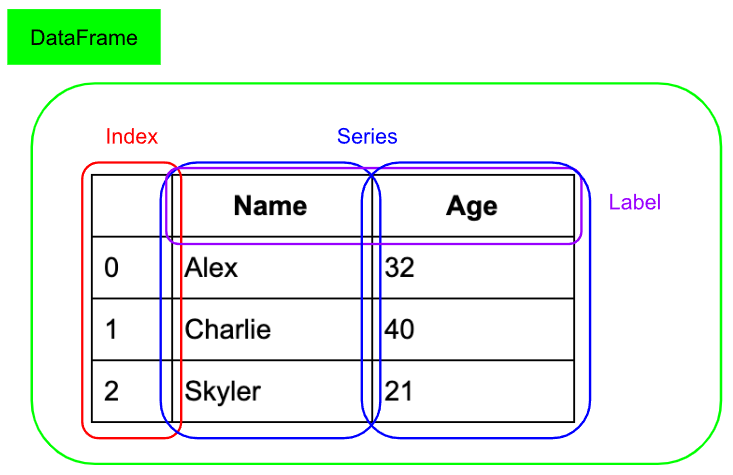

### NumPy

NumPy is a core Python library for fast numerical computing.
It provides the ndarray data structure and efficient operations for math, linear algebra, and array manipulation.

N-Dimensional Array（N 维数组）:ndarray 是一个可以存放任意维度（一维、二维、三维乃至更高维）数据的“超级列表”或“超级表格”，但它要求所有数据必须是同一种类型，并且创建后大小固定。

### Seeds
A seed sets the starting point for a random number generator so that the “random” results are repeatable every time you run the code.

`np.random.seed(5)` means:

Initialize NumPy’s random number generator with seed = 5, so it will produce the same sequence of random numbers each run.

### 一些...的解释
`.sample()`

- Randomly selects a subset of rows from a DataFrame or Series.
- Example: `df.sample(5) `→ randomly pick 5 rows.

`.value_counts()`

- Counts how many times **each unique value** appears in a column.
- Example: `df['city'].value_counts() `→ frequency of each city.

`.count()` 会计算 非缺失值（non-missing values） 的数量。它 不会 计入 NaN。

`.size()`

- Returns the number of elements (rows * columns for DataFrame; length for Series). 返回 DataFrame 中所有元素的总数量, 也就是 rows × columns，但它指的是“元素总数”，不是“行数”本身。
- Example: `df.size `→ total number of cells in the DataFrame.
- 如果某列有 5 个值，其中 2 个是 NaN：
    - .count() 返回 3
    - .size() 返回 5

`.size().nlargest()`

- Takes the size counts of groups and returns the largest ones.
- Usually used after a groupby.
- Example: `df.groupby('city').size().nlargest(3)` → top 3 most common cities.

`.size().to_frame(name="count")`
- Converts the size results (a Series) into a DataFrame with a column named "count".
- Example: df.groupby('city').size().to_frame(name='count')
    - `.size()`统计每个组（每个城市）里有多少行 → 得到一个 Series，索引是城市名，值是相应的行数。
    - `to_frame(name='count')`把刚才得到的 Series 转成一个 DataFrame，并把那一列的列名命名为 "count"。
    - 你得到一个 DataFrame：行索引是城市名, 有一列叫 count, 这一列存放每个城市对应的行数（数量）。在这个 DataFrame 里：城市名是 index，不是 column，也不是 Series。

`.size().reset_index(name="count")`
- `.size()`：对 groupby 的结果计数，得到一个 Series，index 是 group 的标签，value 是每个组的数量。
- `.reset_index(name="count")`：
    - 把原来的 index（例如 city）变成普通列
    - 创建一个名为 "count" 的新列来存储 size 的结果
    - 返回一个新的 DataFrame

.`value_counts().head()`
- `.value_counts()`：统计某一列中每个值出现的 次数。
- `.head()`：取前 5 行（默认是 5）。
- **一句话总结：**显示最常出现的前几个值及其次数。

`.sort()`排序（按值或 index）

`list(df['city'])`把 df['city'] 这一列转换成一个 Python 的 list, 例如：['New York', 'Paris', 'Tokyo']

### size()、count()、value_counts()
`size()`作用：返回每个 group 或整个 DataFrame/Series 的元素总数（包括 NaN）。
- e.g. `df.groupby('city').size()`
表示每个城市的行数（即该组的总行数，包括 NaN 值）。

`count()`
- 作用：返回每个 group 或每列的非空值数量（不包括 NaN）。
- e.g. `df.groupby('city')['age'].count()`
表示每个城市有多少行 age 列不是 NaN。

`value_counts()`
- 作用：统计某个 Series 每个唯一值出现的次数（不含 NaN，可排序）。
- e.g. `df['city'].value_counts()`
表示每个城市在整个 DataFrame 中出现了多少次

带 `.groupby()` 的情况
- `df.groupby('Category').size()`
- `df.groupby('Category')['Value'].count()`
- size() → 返回每个 group 的 行数总和，包括 NaN。
- count() → 返回每个 group 对指定列的 非空值数量（忽略 NaN）。

没有 .groupby() 的情况
- size() → 返回整个 DataFrame 或 Series 的 元素总数（DataFrame 是行×列的积，Series 是元素数）。
- count() → 返回 非空值数量（忽略 NaN）。
- df['Value'].size()   # 3
- df['Value'].count()  # 2 (忽略 NaN)

## Lab 9
`total_trips = len(df)`
- len(df) 返回的是 DataFrame 的行数（row count），也就是数据里有多少条记录
- 所以 total_trips 就是这个 DataFrame 总共有多少行

`df.sample(n=500, random_state=42)`
- 从原 DataFrame df 随机抽取 500 行，生成一个新的 DataFrame sample_df

`sample_df.to_csv("taxidata_sample.csv", index=False)`
- 将抽取的样本保存为 CSV 文件 "taxidata_sample.csv"。
- `index=False` 表示不把行索引写入文件，只保存数据。

sample() 方法主要是在 pandas 这个库里面

NumPy 也有随机抽样的功能，但它通常使用 numpy.random.choice() 等函数来实现，而不是一个名为 sample() 的方法

# Week 10
[Lecture 19](https://computing-in-context.afeld.me/lecture_19.html)

`cb_counts = requests.groupby("Community Board").size().reset_index(name="num_311_requests")`
This line groups the requests DataFrame by the "Community Board" column, counts the number of rows in each group using size(), and then resets the index to turn it into a regular DataFrame with a new column named "num_311_requests" representing the count for each community board.

`sort_values()`按指定列的值对 DataFrame 排序

`cb_counts.sort_values("num_311_requests", ascending=False)`
- 根据 "num_311_requests" 列的值 从大到小（descending）排序。
- 返回一个 排序后的新 DataFrame（原 DataFrame 不变，除非加 inplace=True）。

`new_values = dataframe.apply(my_function, axis=1)`
- This line applies the function `my_function` to each row of dataframe (axis=1 means row-wise) and stores the results in new_values.
- Each row of the DataFrame is passed as a Series to my_function.
- The output of the function for each row becomes an element in new_values. 它 和原 DataFrame dataframe 无关，除非你把它赋回 DataFrame 的某一列

`row["Community Board"][0:2]`取字符串的前两个字符（索引 0 和 1 的字符），用来作为编号的一部分。
- 例如 "MANHATTAN CB 1" → "1MA"
- [0:2] 可以写成 [:2]，效果一样

`board = row["Community Board"]`取当前行（row）中 "Community Board" 列的值，赋给变量 board，方便后续使用。
`num = board[0:2]`取 board 字符串的 前两个字符，赋给变量 num。

### apply()

`apply()` 方法
- `axis=0` → 函数沿 每列 执行（把每一列传给函数）
- `axis=1` → 函数沿 每行 执行（把每一行传给函数）

`apply()` is used to apply a function to each element, row, or column of a Series or DataFrame.
- e.g. `df['length'] = df['name'].apply(len)` apply the len() function to each element of the 'name' column
- On a Series → applies the function to each element.
- On a DataFrame → can apply a function row-wise按行 (axis=1) or column-wise按列 (axis=0).

### Merge

[Merge in Python](https://pandas.pydata.org/docs/user_guide/merging.html#merge)

A **composite key** refers to the use of two or more columns combined to uniquely identify a row across both DataFrames.
A composite key is a unique identifier composed of multiple columns.

`merged_data = pd.merge(left=cb_counts, right=population, left_on="boro_cd", right_on="borocd")`
- 根据左表的 boro_cd 和右表的 borocd 这一列，把两个表对应行合并成一个新的 DataFrame
- left=cb_counts → 左表是 cb_counts; right=population → 右表是 population
- left_on="boro_cd" → 左表用 "boro_cd" 列作为 key
- right_on="borocd" → 右表用 "borocd" 列作为 

`merged_data = merged_data.drop("borocd", axis="columns")`
- 告诉 pandas 删除列 "borocd" 而不是行
- axis="columns" → 表示删除的是列（如果写 axis=0 或 axis="index" 就是删除行）

### drop()

`drop()、sum()` 等 DataFrame 方法
- `axis=0` → 沿着 行的方向操作，也就是对行进行操作（通常理解为“按列操作”）
- `axis=1` → 沿着 列的方向操作，对列进行操作
- `df.drop("col_name", axis=1)`  # 删除列
- `df.sum(axis=0)`               # 按列求和（每列的和）

## Lab 10

`df["Borough"] = df["Borough"].str.strip()`
- 对 "Borough" 列的每个值执行 strip()
- 作用是去掉前后多余空格，保证数据干净一致
- strip剥离

`df[df["Borough"].str.contains(".+\s.+") == True]["Borough"]`

`df["Borough"].str.contains(".+\s.+")`
- 检查 "Borough" 列的每个字符串是否 包含至少一个空格（\s 表示空格，.+ 表示至少一个任意字符）
- 返回一个 布尔 Series（True/False）

`["Borough"]`
- 取出这些行（只保留布尔 Series 为 True 的行）的 "Borough" 列

这两行代码的作用都是 清理 "Borough" 列中的无效值：

`df = df[df["Borough"].notna()]`
- .notna() 返回布尔 Series，True 表示该单元格不是 NaN
- 只保留 "Borough" 列 非空（非 NaN） 的行

`df = df[df["Borough"]!="nan"]`
- 过滤掉字符串 "nan"（有些数据里可能是文本 "nan" 而不是真正的 NaN）